In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_openml

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestRegressor
from numpy import int64
from sklearn import tree 

import graphviz

In [11]:
data = fetch_california_housing(as_frame=True)
X = pd.DataFrame(data.data, columns=data.feature_names)
Y = data.target
X = minmax_scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
# X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size = 0.25)
# print(X)
# print(Y)

print(X_train.shape)
# print(X_validation.shape)
print(X_test.shape)

(16512, 8)
(4128, 8)


## 2.4.1 Decision Tree Regressor

In [3]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [4]:
print("Training set accuracy: {}".format(model.score(X_train, Y_train)))
print("Test set accuracy: {}".format(model.score(X_test, Y_test)))

Training set accuracy: 1.0
Test set accuracy: 0.6106317868290094


In [17]:
criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
param = [{'criterion':criterion}]

model = DecisionTreeRegressor()

tree_reg = GridSearchCV(model, param, verbose=2, return_train_score=True)
tree_reg.fit(X_train, Y_train)
print('Best:',tree_reg.best_params_,'Score:', tree_reg.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ............................criterion=squared_error; total time=   0.1s
[CV] END ............................criterion=squared_error; total time=   0.1s
[CV] END ............................criterion=squared_error; total time=   0.1s
[CV] END ............................criterion=squared_error; total time=   0.1s
[CV] END ............................criterion=squared_error; total time=   0.1s
[CV] END .............................criterion=friedman_mse; total time=   0.1s
[CV] END .............................criterion=friedman_mse; total time=   0.1s
[CV] END .............................criterion=friedman_mse; total time=   0.1s
[CV] END .............................criterion=friedman_mse; total time=   0.1s
[CV] END .............................criterion=friedman_mse; total time=   0.1s
[CV] END ...........................criterion=absolute_error; total time=   4.9s
[CV] END ...........................criterion=abs

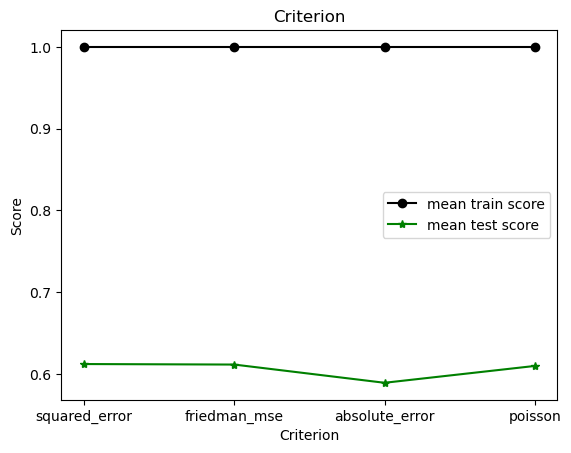

In [20]:
plt.plot(criterion, tree_reg.cv_results_['mean_train_score'],'ko-', label="mean train score")
plt.plot(criterion, tree_reg.cv_results_['mean_test_score'], 'g*-', label="mean test score")
plt.xlabel("Criterion")
plt.ylabel("Score")
plt.title("Criterion")
plt.legend()
plt.show()

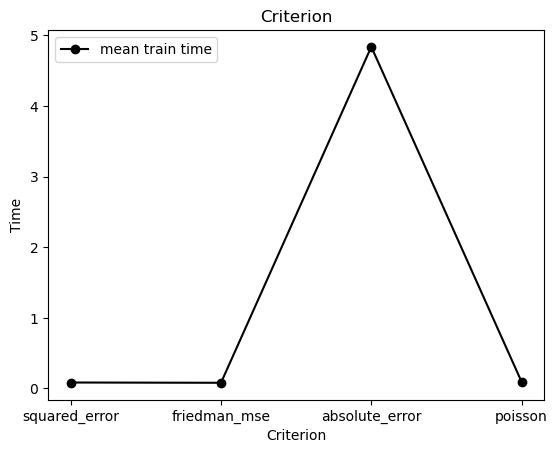

In [21]:
plt.plot(criterion, tree_reg.cv_results_['mean_fit_time'],'ko-', label="mean train time")
plt.xlabel("Criterion")
plt.ylabel("Time")
plt.title("Criterion")
plt.legend()
plt.show()

In [22]:
max_depth = np.arange(1,40)
param = [{'criterion':["poisson"],'max_depth':max_depth}]
model = DecisionTreeRegressor()
tree_reg = GridSearchCV(model, param, verbose=2, return_train_score=True)
tree_reg.fit(X_train, Y_train)
print('Best:',tree_reg.best_params_,'Score:', tree_reg.best_score_)

Fitting 5 folds for each of 39 candidates, totalling 195 fits
[CV] END .....................criterion=poisson, max_depth=1; total time=   0.0s
[CV] END .....................criterion=poisson, max_depth=1; total time=   0.0s
[CV] END .....................criterion=poisson, max_depth=1; total time=   0.0s
[CV] END .....................criterion=poisson, max_depth=1; total time=   0.0s
[CV] END .....................criterion=poisson, max_depth=1; total time=   0.0s
[CV] END .....................criterion=poisson, max_depth=2; total time=   0.0s
[CV] END .....................criterion=poisson, max_depth=2; total time=   0.0s
[CV] END .....................criterion=poisson, max_depth=2; total time=   0.0s
[CV] END .....................criterion=poisson, max_depth=2; total time=   0.0s
[CV] END .....................criterion=poisson, max_depth=2; total time=   0.0s
[CV] END .....................criterion=poisson, max_depth=3; total time=   0.0s
[CV] END .....................criterion=poisson

[CV] END ....................criterion=poisson, max_depth=21; total time=   0.1s
[CV] END ....................criterion=poisson, max_depth=21; total time=   0.1s
[CV] END ....................criterion=poisson, max_depth=21; total time=   0.1s
[CV] END ....................criterion=poisson, max_depth=21; total time=   0.1s
[CV] END ....................criterion=poisson, max_depth=22; total time=   0.1s
[CV] END ....................criterion=poisson, max_depth=22; total time=   0.1s
[CV] END ....................criterion=poisson, max_depth=22; total time=   0.1s
[CV] END ....................criterion=poisson, max_depth=22; total time=   0.1s
[CV] END ....................criterion=poisson, max_depth=22; total time=   0.1s
[CV] END ....................criterion=poisson, max_depth=23; total time=   0.1s
[CV] END ....................criterion=poisson, max_depth=23; total time=   0.1s
[CV] END ....................criterion=poisson, max_depth=23; total time=   0.1s
[CV] END ...................

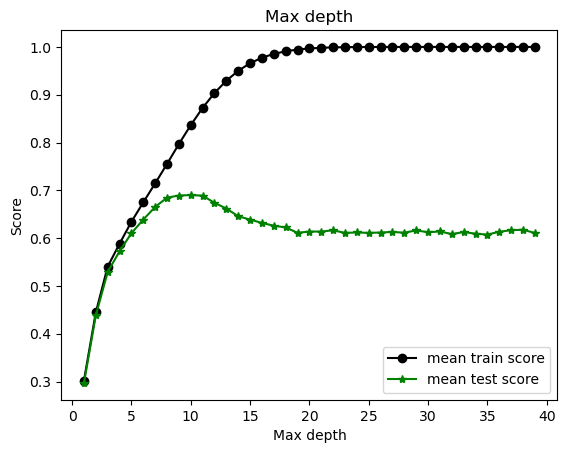

In [23]:
plt.plot(max_depth, tree_reg.cv_results_['mean_train_score'],'ko-', label="mean train score")
plt.plot(max_depth, tree_reg.cv_results_['mean_test_score'], 'g*-', label="mean test score")
plt.xlabel("Max depth")
plt.ylabel("Score")
plt.title("Max depth")
plt.legend()
plt.show()

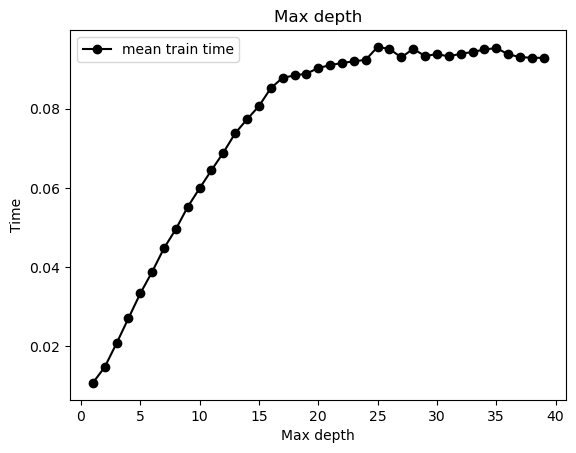

In [26]:
plt.plot(max_depth, tree_reg.cv_results_['mean_fit_time'],'ko-', label="mean train time")
plt.ylabel("Time")
plt.xlabel("Max depth")
plt.title("Max depth")
plt.legend()
plt.show()

In [27]:
splitter = ['best', 'random']
param = [{'criterion':["poisson"],'max_depth':[10],'splitter':splitter}]
model = DecisionTreeRegressor()
tree_reg = GridSearchCV(model, param, verbose=2, return_train_score=True)
tree_reg.fit(X_train, Y_train)
print('Best:',tree_reg.best_params_,'Score:', tree_reg.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .....criterion=poisson, max_depth=10, splitter=best; total time=   0.1s
[CV] END .....criterion=poisson, max_depth=10, splitter=best; total time=   0.1s
[CV] END .....criterion=poisson, max_depth=10, splitter=best; total time=   0.1s
[CV] END .....criterion=poisson, max_depth=10, splitter=best; total time=   0.1s
[CV] END .....criterion=poisson, max_depth=10, splitter=best; total time=   0.1s
[CV] END ...criterion=poisson, max_depth=10, splitter=random; total time=   0.0s
[CV] END ...criterion=poisson, max_depth=10, splitter=random; total time=   0.0s
[CV] END ...criterion=poisson, max_depth=10, splitter=random; total time=   0.0s
[CV] END ...criterion=poisson, max_depth=10, splitter=random; total time=   0.0s
[CV] END ...criterion=poisson, max_depth=10, splitter=random; total time=   0.0s
Best: {'criterion': 'poisson', 'max_depth': 10, 'splitter': 'best'} Score: 0.6921993593923002


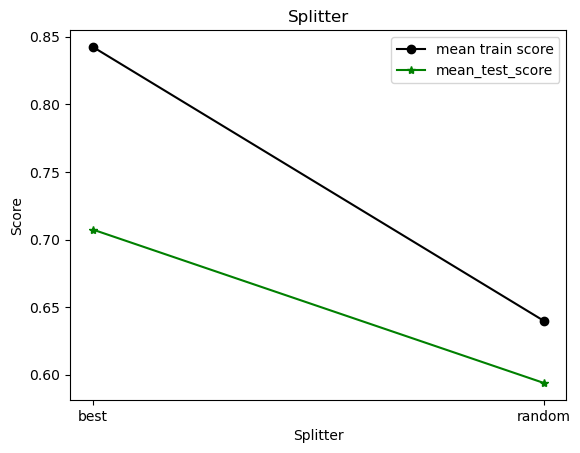

In [32]:
plt.plot(splitter, tree_reg.cv_results_['mean_train_score'],'ko-', label="mean train score")
plt.plot(splitter, tree_reg.cv_results_['mean_test_score'], 'g*-', label="mean test score")
plt.xlabel("Splitter")
plt.ylabel("Score")
plt.title("Splitter")
plt.legend()
plt.show()

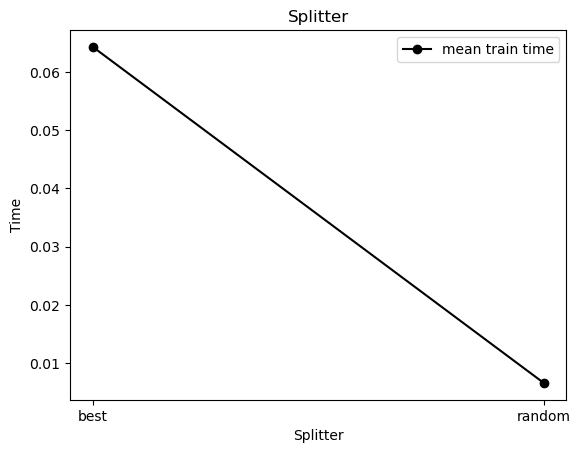

In [28]:
plt.plot(splitter, tree_reg.cv_results_['mean_fit_time'],'ko-', label="mean train time")
plt.ylabel("Time")
plt.xlabel("Splitter")
plt.title("Splitter")
plt.legend()
plt.show()

In [42]:
max_feature = np.arange(1,9)
param = [{'criterion':["poisson"],'max_depth':[10],'splitter':["best"], 'max_features':max_feature}]
model = DecisionTreeRegressor()
tree_reg = GridSearchCV(model, param, verbose=2, return_train_score=True)
tree_reg.fit(X_train, Y_train)
print('Best:',tree_reg.best_params_,'Score:', tree_reg.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END criterion=poisson, max_depth=10, max_features=1, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=10, max_features=1, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=10, max_features=1, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=10, max_features=1, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=10, max_features=1, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=10, max_features=2, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=10, max_features=2, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=10, max_features=2, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=10, max_features=2, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=10, max_features=2, splitter=best; total time=   0.0s
[CV] END criterion=p

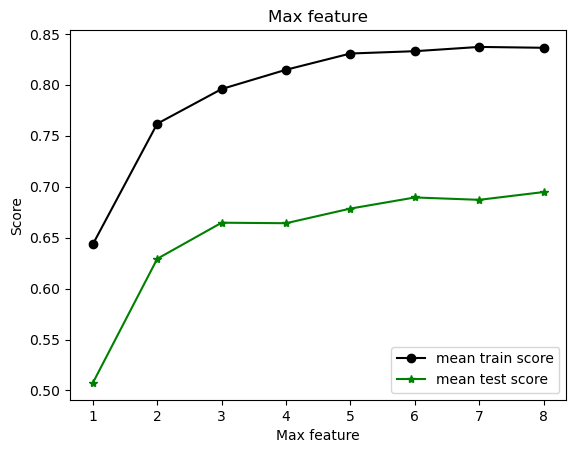

In [43]:
plt.plot(max_feature, tree_reg.cv_results_['mean_train_score'],'ko-', label="mean train score")
plt.plot(max_feature, tree_reg.cv_results_['mean_test_score'], 'g*-', label="mean test score")
plt.xlabel("Max feature")
plt.ylabel("Score")
plt.title("Max feature")
plt.legend()
plt.show()

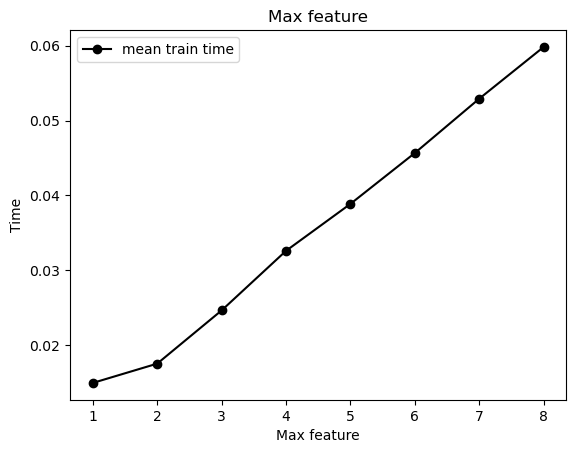

In [44]:
plt.plot(max_feature, tree_reg.cv_results_['mean_fit_time'],'ko-', label="mean train time")
plt.ylabel("Time")
plt.xlabel("Max feature")
plt.title("Max feature")
plt.legend()
plt.show()

In [32]:
min_samples_split = np.arange(2,100)
param = [{'criterion':["poisson"],'max_depth':[10],'splitter':["best"], 'max_features':[10], 'min_samples_split':min_samples_split}]
model = DecisionTreeRegressor()
tree_reg = GridSearchCV(model, param, verbose=2, return_train_score=True)
tree_reg.fit(X_train, Y_train)
print('Best:',tree_reg.best_params_,'Score:', tree_reg.best_score_)

Fitting 5 folds for each of 98 candidates, totalling 490 fits
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=2, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=2, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=2, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=2, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=2, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=3, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=3, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=3, splitter=best; total time=   0.1s
[CV] END criterion=poisson

[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=16, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=17, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=17, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=17, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=17, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=17, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=18, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=18, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=18,

[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=31, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=31, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=31, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=31, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=32, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=32, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=32, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=32, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=32,

[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=45, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=45, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=46, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=46, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=46, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=46, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=46, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=47, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=47,

[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=60, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=60, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=60, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=60, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=60, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=61, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=61, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=61, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=61,

[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=74, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=74, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=74, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=75, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=75, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=75, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=75, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=75, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=76,

[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=88, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=89, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=89, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=89, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=89, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=89, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=90, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=90, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_split=90,

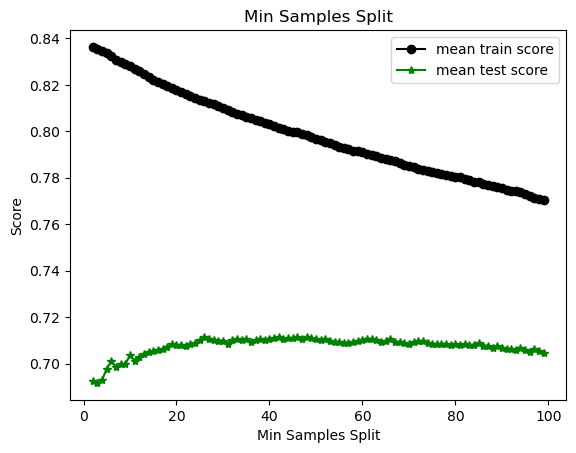

In [33]:
plt.plot(min_samples_split, tree_reg.cv_results_['mean_train_score'],'ko-', label="mean train score")
plt.plot(min_samples_split, tree_reg.cv_results_['mean_test_score'], 'g*-', label="mean test score")
plt.xlabel("Min Samples Split")
plt.ylabel("Score")
plt.title("Min Samples Split")
plt.legend()
plt.show()

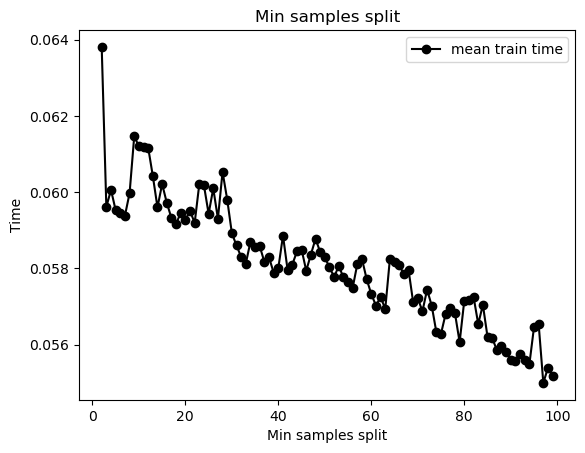

In [34]:
plt.plot(min_samples_split, tree_reg.cv_results_['mean_fit_time'],'ko-', label="mean train time")
plt.ylabel("Time")
plt.xlabel("Min samples split")
plt.title("Min samples split")
plt.legend()
plt.show()

In [35]:
min_samples_leaf = np.arange(2,100)
param = [{'criterion':["poisson"],'max_depth':[10],'splitter':["best"], 'max_features':[10], 'min_samples_split':[80], 'min_samples_leaf':min_samples_leaf}]
model = DecisionTreeRegressor()
tree_reg = GridSearchCV(model, param, verbose=2, return_train_score=True)
tree_reg.fit(X_train, Y_train)
print('Best:',tree_reg.best_params_,'Score:', tree_reg.best_score_)

Fitting 5 folds for each of 98 candidates, totalling 490 fits
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=3, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=3, min_samples_split=80, splitter=best; total time= 

[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=14, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=14, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=15, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=15, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=15, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=15, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=15, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_fe

[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=27, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=27, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=27, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=28, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=28, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=28, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=28, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_fe

[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=40, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=40, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=40, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=40, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=41, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=41, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=41, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_fe

[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=53, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=53, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=53, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=53, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=53, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=54, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=54, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_fe

[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=65, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=66, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=66, min_samples_split=80, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=66, min_samples_split=80, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=66, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=66, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=67, min_samples_split=80, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=10, max_fe

[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=78, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=78, min_samples_split=80, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=79, min_samples_split=80, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=79, min_samples_split=80, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=79, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=79, min_samples_split=80, splitter=best; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=79, min_samples_split=80, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=10, max_fe

[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=91, min_samples_split=80, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=91, min_samples_split=80, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=92, min_samples_split=80, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=92, min_samples_split=80, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=92, min_samples_split=80, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=92, min_samples_split=80, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=10, max_features=10, min_samples_leaf=92, min_samples_split=80, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=10, max_fe

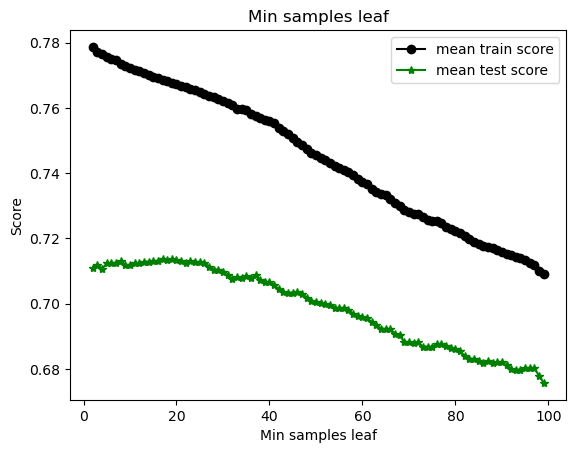

In [36]:
plt.plot(min_samples_leaf, tree_reg.cv_results_['mean_train_score'],'ko-', label="mean train score")
plt.plot(min_samples_leaf, tree_reg.cv_results_['mean_test_score'], 'g*-', label="mean test score")
plt.xlabel("Min samples leaf")
plt.ylabel("Score")
plt.title("Min samples leaf")
plt.legend()
plt.show()

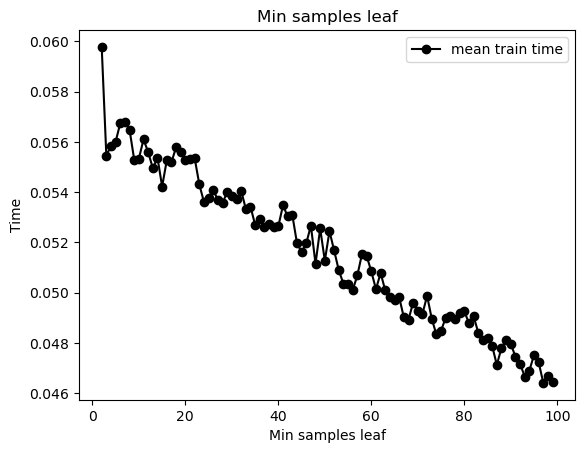

In [37]:
plt.plot(min_samples_leaf, tree_reg.cv_results_['mean_fit_time'],'ko-', label="mean train time")
plt.ylabel("Time")
plt.xlabel("Min samples leaf")
plt.title("Min samples leaf")
plt.legend()
plt.show()

In [4]:
best_model = DecisionTreeRegressor(criterion='poisson', max_depth=10, max_features=8, min_samples_leaf=17, min_samples_split=80, splitter='best')
best_model.fit(X_train, Y_train)
Y_pred = best_model.predict(X_test)
best_model.score(X_test, Y_test)

0.7377555793067032

In [5]:
test_mse = mean_squared_error(Y_test, Y_pred)
test_mae = mean_absolute_error(Y_test, Y_pred)
test_r2 = r2_score(Y_test, Y_pred)
print("MSE: ", test_mse)
print("MAE: ", test_mae)
print("r2: ", test_r2)

MSE:  0.3558127523753734
MAE:  0.4002101728274217
r2:  0.7377555793067032


/var/folders/kr/twfz3fn10rv0mmnqcq9jqhqm0000gn/T/ipykernel_17511/1481640036.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(index[100:300], Y_test[100:300], label='Real Price', c='r')


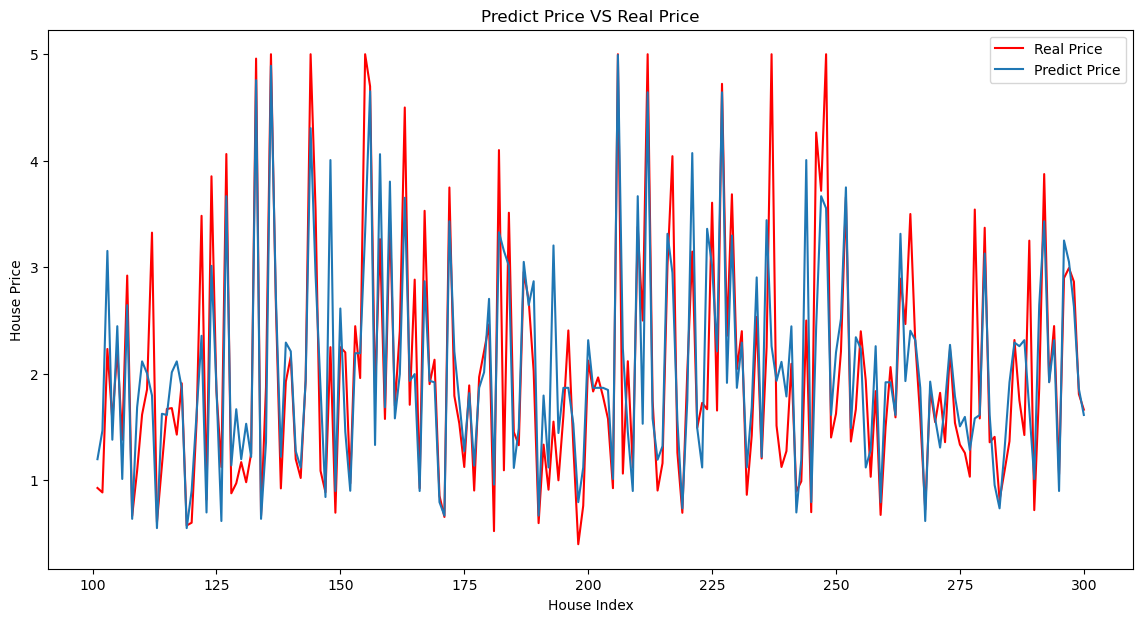

In [113]:
index = np.arange(1,len(X_test)+1)
plt.figure(figsize=(14,7))
plt.plot(index[100:300], Y_test[100:300], label='Real Price', c='r')
plt.plot(index[100:300], Y_pred[100:300], label='Predict Price')
plt.title("Predict Price VS Real Price")
plt.xlabel("House Index")
plt.ylabel("House Price")
plt.legend()
plt.show()

In [17]:
feature_names=data.feature_names         
data_graph=tree.export_graphviz(best_model.fit(X_train, Y_train) 
                                ,feature_names=feature_names
                                ,filled=True
                                ,rounded=True)
graph=graphviz.Source(data_graph)
graph.view()

'Source.gv.pdf'

## 2.4.2 Emsemble Methods

### 1. Baging

In [60]:
model = DecisionTreeRegressor(criterion='poisson', max_depth=10, max_features=10, min_samples_leaf=17, min_samples_split=80, splitter='best')
reg = BaggingRegressor(model, n_estimators=30, random_state=0, verbose=0).fit(X_train, Y_train)
baging_train = reg.score(X_train, Y_train)
baging_test = reg.score(X_test, Y_test)
print(f"Test set accuracy: {reg.score(X_test, Y_test)}")

Test set accuracy: 0.7754163669442938


In [59]:
n_estimators = np.arange(1,50)
param = [{'n_estimators':n_estimators}]
tree_reg = GridSearchCV(reg, param, verbose=2, return_train_score=True)
tree_reg.fit(X_train, Y_train)
print('Best:',tree_reg.best_params_,'Score:', tree_reg.best_score_)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.1s
[CV] END .....................................n_estimators=2; total time=   0.1s
[CV] END .....................................n_estimators=2; total time=   0.1s
[CV] END .....................................n_estimators=2; total time=   0.1s
[CV] END .....................................n_estimators=2; total time=   0.1s
[CV] END .....................................n_estimators=3; total time=   0.1s
[CV] END .....................................n

[CV] END ....................................n_estimators=21; total time=   0.7s
[CV] END ....................................n_estimators=21; total time=   0.7s
[CV] END ....................................n_estimators=21; total time=   0.7s
[CV] END ....................................n_estimators=21; total time=   0.7s
[CV] END ....................................n_estimators=22; total time=   0.7s
[CV] END ....................................n_estimators=22; total time=   0.7s
[CV] END ....................................n_estimators=22; total time=   0.7s
[CV] END ....................................n_estimators=22; total time=   0.7s
[CV] END ....................................n_estimators=22; total time=   0.7s
[CV] END ....................................n_estimators=23; total time=   0.8s
[CV] END ....................................n_estimators=23; total time=   0.8s
[CV] END ....................................n_estimators=23; total time=   0.8s
[CV] END ...................

[CV] END ....................................n_estimators=41; total time=   1.3s
[CV] END ....................................n_estimators=41; total time=   1.4s
[CV] END ....................................n_estimators=42; total time=   1.4s
[CV] END ....................................n_estimators=42; total time=   1.4s
[CV] END ....................................n_estimators=42; total time=   1.4s
[CV] END ....................................n_estimators=42; total time=   1.4s
[CV] END ....................................n_estimators=42; total time=   1.4s
[CV] END ....................................n_estimators=43; total time=   1.4s
[CV] END ....................................n_estimators=43; total time=   1.4s
[CV] END ....................................n_estimators=43; total time=   1.4s
[CV] END ....................................n_estimators=43; total time=   1.4s
[CV] END ....................................n_estimators=43; total time=   1.4s
[CV] END ...................

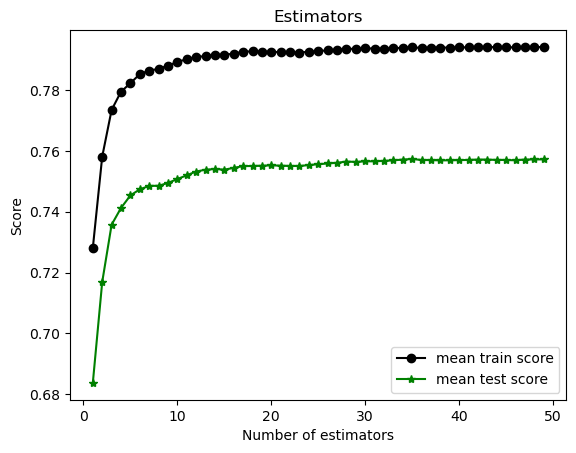

In [105]:
plt.plot(n_estimators, tree_reg.cv_results_['mean_train_score'],'ko-', label="mean train score")
plt.plot(n_estimators, tree_reg.cv_results_['mean_test_score'], 'g*-', label="mean test score")
plt.xlabel("Number of estimators")
plt.ylabel("Score")
plt.title("Estimators")
plt.legend()
plt.show()

### 2. Boosting methods

In [117]:
model = DecisionTreeRegressor(criterion='poisson', max_depth=10, max_features=10, min_samples_leaf=17, min_samples_split=80, splitter='best')
reg = AdaBoostRegressor(base_estimator=model, random_state=0, n_estimators=30).fit(X_train, Y_train)
boosting_train = reg.score(X_train, Y_train)
boosting_test = reg.score(X_test, Y_test)
print(f"Test set accuracy: {reg.score(X_test, Y_test)}")

Test set accuracy: 0.7917040423116276


In [118]:
n_estimators = np.arange(1,30)
param = [{'n_estimators':n_estimators}]
tree_reg = GridSearchCV(reg, param, verbose=2, return_train_score=True)
tree_reg.fit(X_train, Y_train)
print('Best:',tree_reg.best_params_,'Score:', tree_reg.best_score_)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV] END .....................................n_estimators=1; total time=   0.1s
[CV] END .....................................n_estimators=1; total time=   0.1s
[CV] END .....................................n_estimators=1; total time=   0.1s
[CV] END .....................................n_estimators=1; total time=   0.1s
[CV] END .....................................n_estimators=1; total time=   0.1s
[CV] END .....................................n_estimators=2; total time=   0.1s
[CV] END .....................................n_estimators=2; total time=   0.1s
[CV] END .....................................n_estimators=2; total time=   0.1s
[CV] END .....................................n_estimators=2; total time=   0.1s
[CV] END .....................................n_estimators=2; total time=   0.1s
[CV] END .....................................n_estimators=3; total time=   0.2s
[CV] END .....................................n

[CV] END ....................................n_estimators=21; total time=   0.9s
[CV] END ....................................n_estimators=21; total time=   0.9s
[CV] END ....................................n_estimators=21; total time=   0.9s
[CV] END ....................................n_estimators=21; total time=   0.9s
[CV] END ....................................n_estimators=22; total time=   1.0s
[CV] END ....................................n_estimators=22; total time=   1.0s
[CV] END ....................................n_estimators=22; total time=   1.0s
[CV] END ....................................n_estimators=22; total time=   1.0s
[CV] END ....................................n_estimators=22; total time=   1.0s
[CV] END ....................................n_estimators=23; total time=   1.0s
[CV] END ....................................n_estimators=23; total time=   1.0s
[CV] END ....................................n_estimators=23; total time=   1.0s
[CV] END ...................

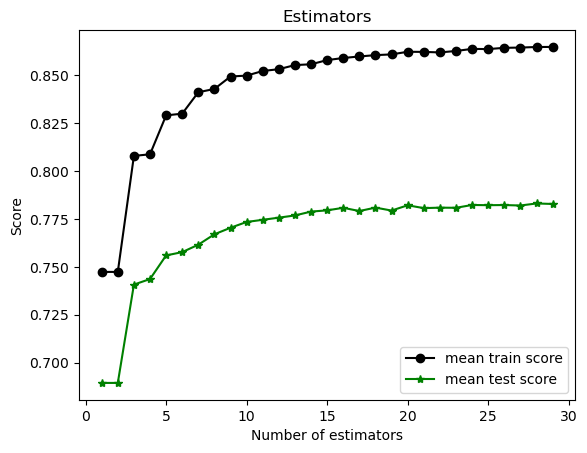

In [119]:
plt.plot(n_estimators, tree_reg.cv_results_['mean_train_score'],'ko-', label="mean train score")
plt.plot(n_estimators, tree_reg.cv_results_['mean_test_score'], 'g*-', label="mean test score")
plt.xlabel("Number of estimators")
plt.ylabel("Score")
plt.title("Estimators")
plt.legend()
plt.show()

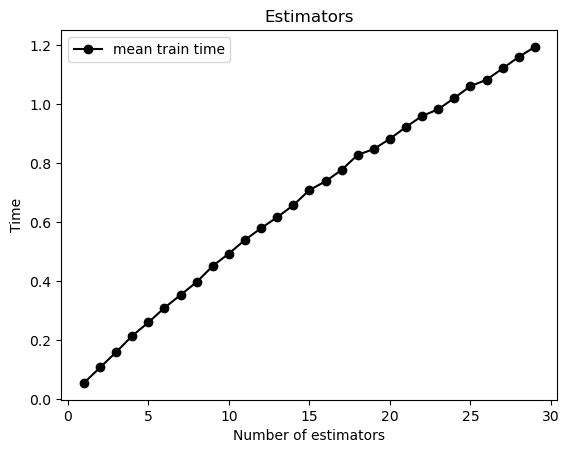

In [120]:
plt.plot(n_estimators, tree_reg.cv_results_['mean_fit_time'],'ko-', label="mean train time")
plt.xlabel("Number of estimators")
plt.ylabel("Time")
plt.title("Estimators")
plt.legend()
plt.show()

In [121]:
model = DecisionTreeRegressor(criterion='poisson', max_depth=10, max_features=10, min_samples_leaf=17, min_samples_split=80, splitter='best')
reg = AdaBoostRegressor(base_estimator=model, random_state=0, n_estimators=33).fit(X_train, Y_train)
boosting_train = reg.score(X_train, Y_train)
boosting_test = reg.score(X_test, Y_test)
y_pred = reg.predict(X_test)
print(f"Test set accuracy: {reg.score(X_test, Y_test)}")

Test set accuracy: 0.7917467199135049


In [123]:
test_mse = mean_squared_error(Y_test, y_pred)
test_mae = mean_absolute_error(Y_test, y_pred)
test_r2 = r2_score(Y_test, y_pred)
print("MSE: ", test_mse)
print("MAE: ", test_mae)
print("r2: ", test_r2)

MSE:  0.27945218917438736
MAE:  0.40039542513434506
r2:  0.7917467199135049


/var/folders/kr/twfz3fn10rv0mmnqcq9jqhqm0000gn/T/ipykernel_17511/2172829751.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(index[100:300], Y_test[100:300], label='Real Price', c='r')


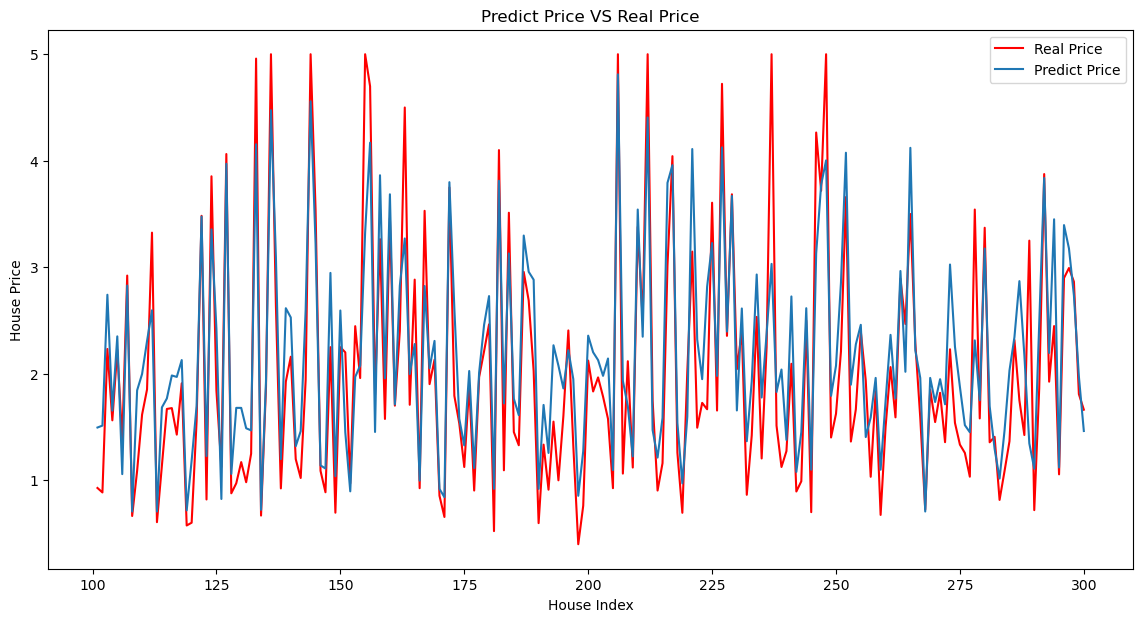

In [111]:
index = np.arange(1,len(X_test)+1)
plt.figure(figsize=(14,7))
plt.plot(index[100:300], Y_test[100:300], label='Real Price', c='r')
plt.plot(index[100:300], y_pred[100:300], label='Predict Price')
plt.title("Predict Price VS Real Price")
plt.xlabel("House Index")
plt.ylabel("House Price")
plt.legend()
plt.show()

### 3. Random Forest Regressor

In [62]:
reg = RandomForestRegressor(criterion='poisson', max_depth=10, max_features=10, min_samples_leaf=17, min_samples_split=80)
reg.fit(X_train, Y_train)
reg_train = reg.score(X_train, Y_train)
reg_test = reg.score(X_test, Y_test)
print(f"Test set accuracy: {reg.score(X_test, Y_test)}")

Test set accuracy: 0.7782740898813163


In [115]:
n_estimators = np.arange(1,200)
param = [{'n_estimators':n_estimators}]
tree_reg = GridSearchCV(reg, param, verbose=2, return_train_score=True)
tree_reg.fit(X_train, Y_train)
print('Best:',tree_reg.best_params_,'Score:', tree_reg.best_score_)

Fitting 5 folds for each of 199 candidates, totalling 995 fits
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.1s
[CV] END .....................................n_estimators=2; total time=   0.1s
[CV] END .....................................n_estimators=2; total time=   0.1s
[CV] END .....................................n_estimators=2; total time=   0.1s
[CV] END .....................................n_estimators=2; total time=   0.1s
[CV] END .....................................n_estimators=3; total time=   0.1s
[CV] END .....................................

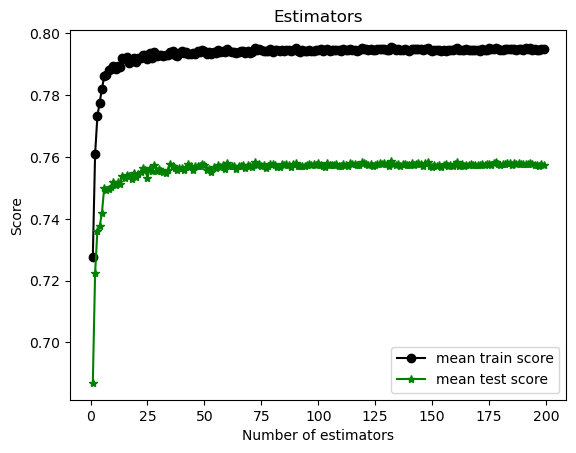

In [116]:
plt.plot(n_estimators, tree_reg.cv_results_['mean_train_score'],'ko-', label="mean train score")
plt.plot(n_estimators, tree_reg.cv_results_['mean_test_score'], 'g*-', label="mean test score")
plt.xlabel("Number of estimators")
plt.ylabel("Score")
plt.title("Estimators")
plt.legend()
plt.show()

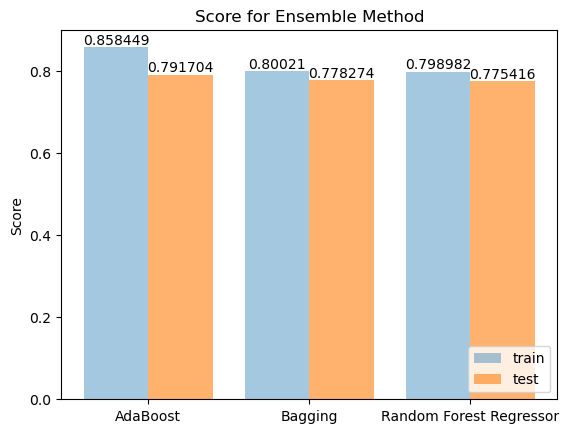

In [96]:
x = np.arange(3)
total_width, n = 0.8, 2
width = total_width / n
x = x - (total_width - width) / 2

train = [boosting_train, reg_train, baging_train]
test = [boosting_test, reg_test, baging_test]
name = ["AdaBoost", "Bagging", "Random Forest Regressor"]
p1 = plt.bar(x, train, width=width, label="train", alpha=0.4)
p2 = plt.bar(x+width, test, width=width, label="test", alpha=0.6)
plt.bar_label(p1)
plt.bar_label(p2)
plt.xticks([x for x in range(3)], name)
plt.legend(loc=4)
plt.title("Score for Ensemble Method")
plt.ylabel("Score")
plt.show()
